In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## Housing Data

In [4]:
# import data for the housing market
housing_data = pd.read_csv("HousingData.csv")

In [5]:
# Showing different information about the data collected about the houses
housing_data.describe()

,PID,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Garage Cars,Yr Sold,SalePrice
count,2.773000e+03,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.00000,2773.000000,2773.000000
mean,7.079379e+08,10285.692391,6.178507,5.572665,1972.886765,1984.831951,455.019473,1515.437793,0.437793,0.061305,1.579156,0.389470,2.847818,1.034980,1.86621,2007.786873,185090.307609
std,1.884482e+08,8040.761794,1.380737,1.069822,29.460814,20.620197,457.947084,502.131701,0.519643,0.242921,0.551096,0.503728,0.800834,0.187648,0.65227,1.314949,79584.836009
min,5.263011e+08,1300.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2006.000000,12789.000000
25%,5.284390e+08,7540.000000,5.000000,5.000000,1955.000000,1966.000000,0.000000,1144.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.00000,2007.000000,133000.000000
50%,5.354032e+08,9549.000000,6.000000,5.000000,1976.000000,1994.000000,386.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.00000,2008.000000,165000.000000
75%,9.071260e+08,11645.000000,7.000000,6.000000,2001.000000,2004.000000,747.000000,1761.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.00000,2009.000000,217000.000000
max,1.007100e+09,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,5642.000000,2.000000,2.000000,4.000000,2.000000,6.000000,3.000000,5.00000,2010.000000,755000.000000


In [6]:
# Showing additional data about the information about the housing market
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2773 entries, 0 to 2772
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PID             2773 non-null   int64
 1   Lot Area        2773 non-null   int64
 2   Overall Qual    2773 non-null   int64
 3   Overall Cond    2773 non-null   int64
 4   Year Built      2773 non-null   int64
 5   Year Remod/Add  2773 non-null   int64
 6   BsmtFin SF 1    2773 non-null   int64
 7   Gr Liv Area     2773 non-null   int64
 8   Bsmt Full Bath  2773 non-null   int64
 9   Bsmt Half Bath  2773 non-null   int64
 10  Full Bath       2773 non-null   int64
 11  Half Bath       2773 non-null   int64
 12  Bedroom AbvGr   2773 non-null   int64
 13  Kitchen AbvGr   2773 non-null   int64
 14  Garage Cars     2773 non-null   int64
 15  Yr Sold         2773 non-null   int64
 16  SalePrice       2773 non-null   int64
dtypes: int64(17)
memory usage: 368.4 KB


In [7]:
housing_data.drop(['PID'], axis=1, inplace=True)

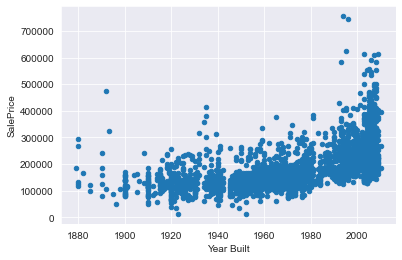

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

#The following shows how the year the house was built relates to the price of the home
housing_data.plot(x = "Year Built" , y = "SalePrice" , kind = "scatter");

## As can be seen from the graph above, the year a home was built seemed to have an impact on the sale price.

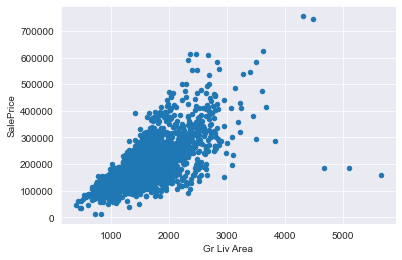

In [9]:
#The following shows how the ground level square footage relates to the price of the home
housing_data.plot(x = "Gr Liv Area" , y = "SalePrice" , kind = "scatter");

## As can be seen from the graph above, the square footage of a home seemed to have a large impact on the sale price. There seems to be a very strong correlation between the two.

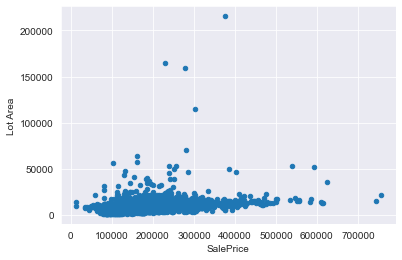

In [10]:
#The following shows how the lot size relates to the price of the home
housing_data.plot(x = "SalePrice" , y = "Lot Area" , kind = "scatter");

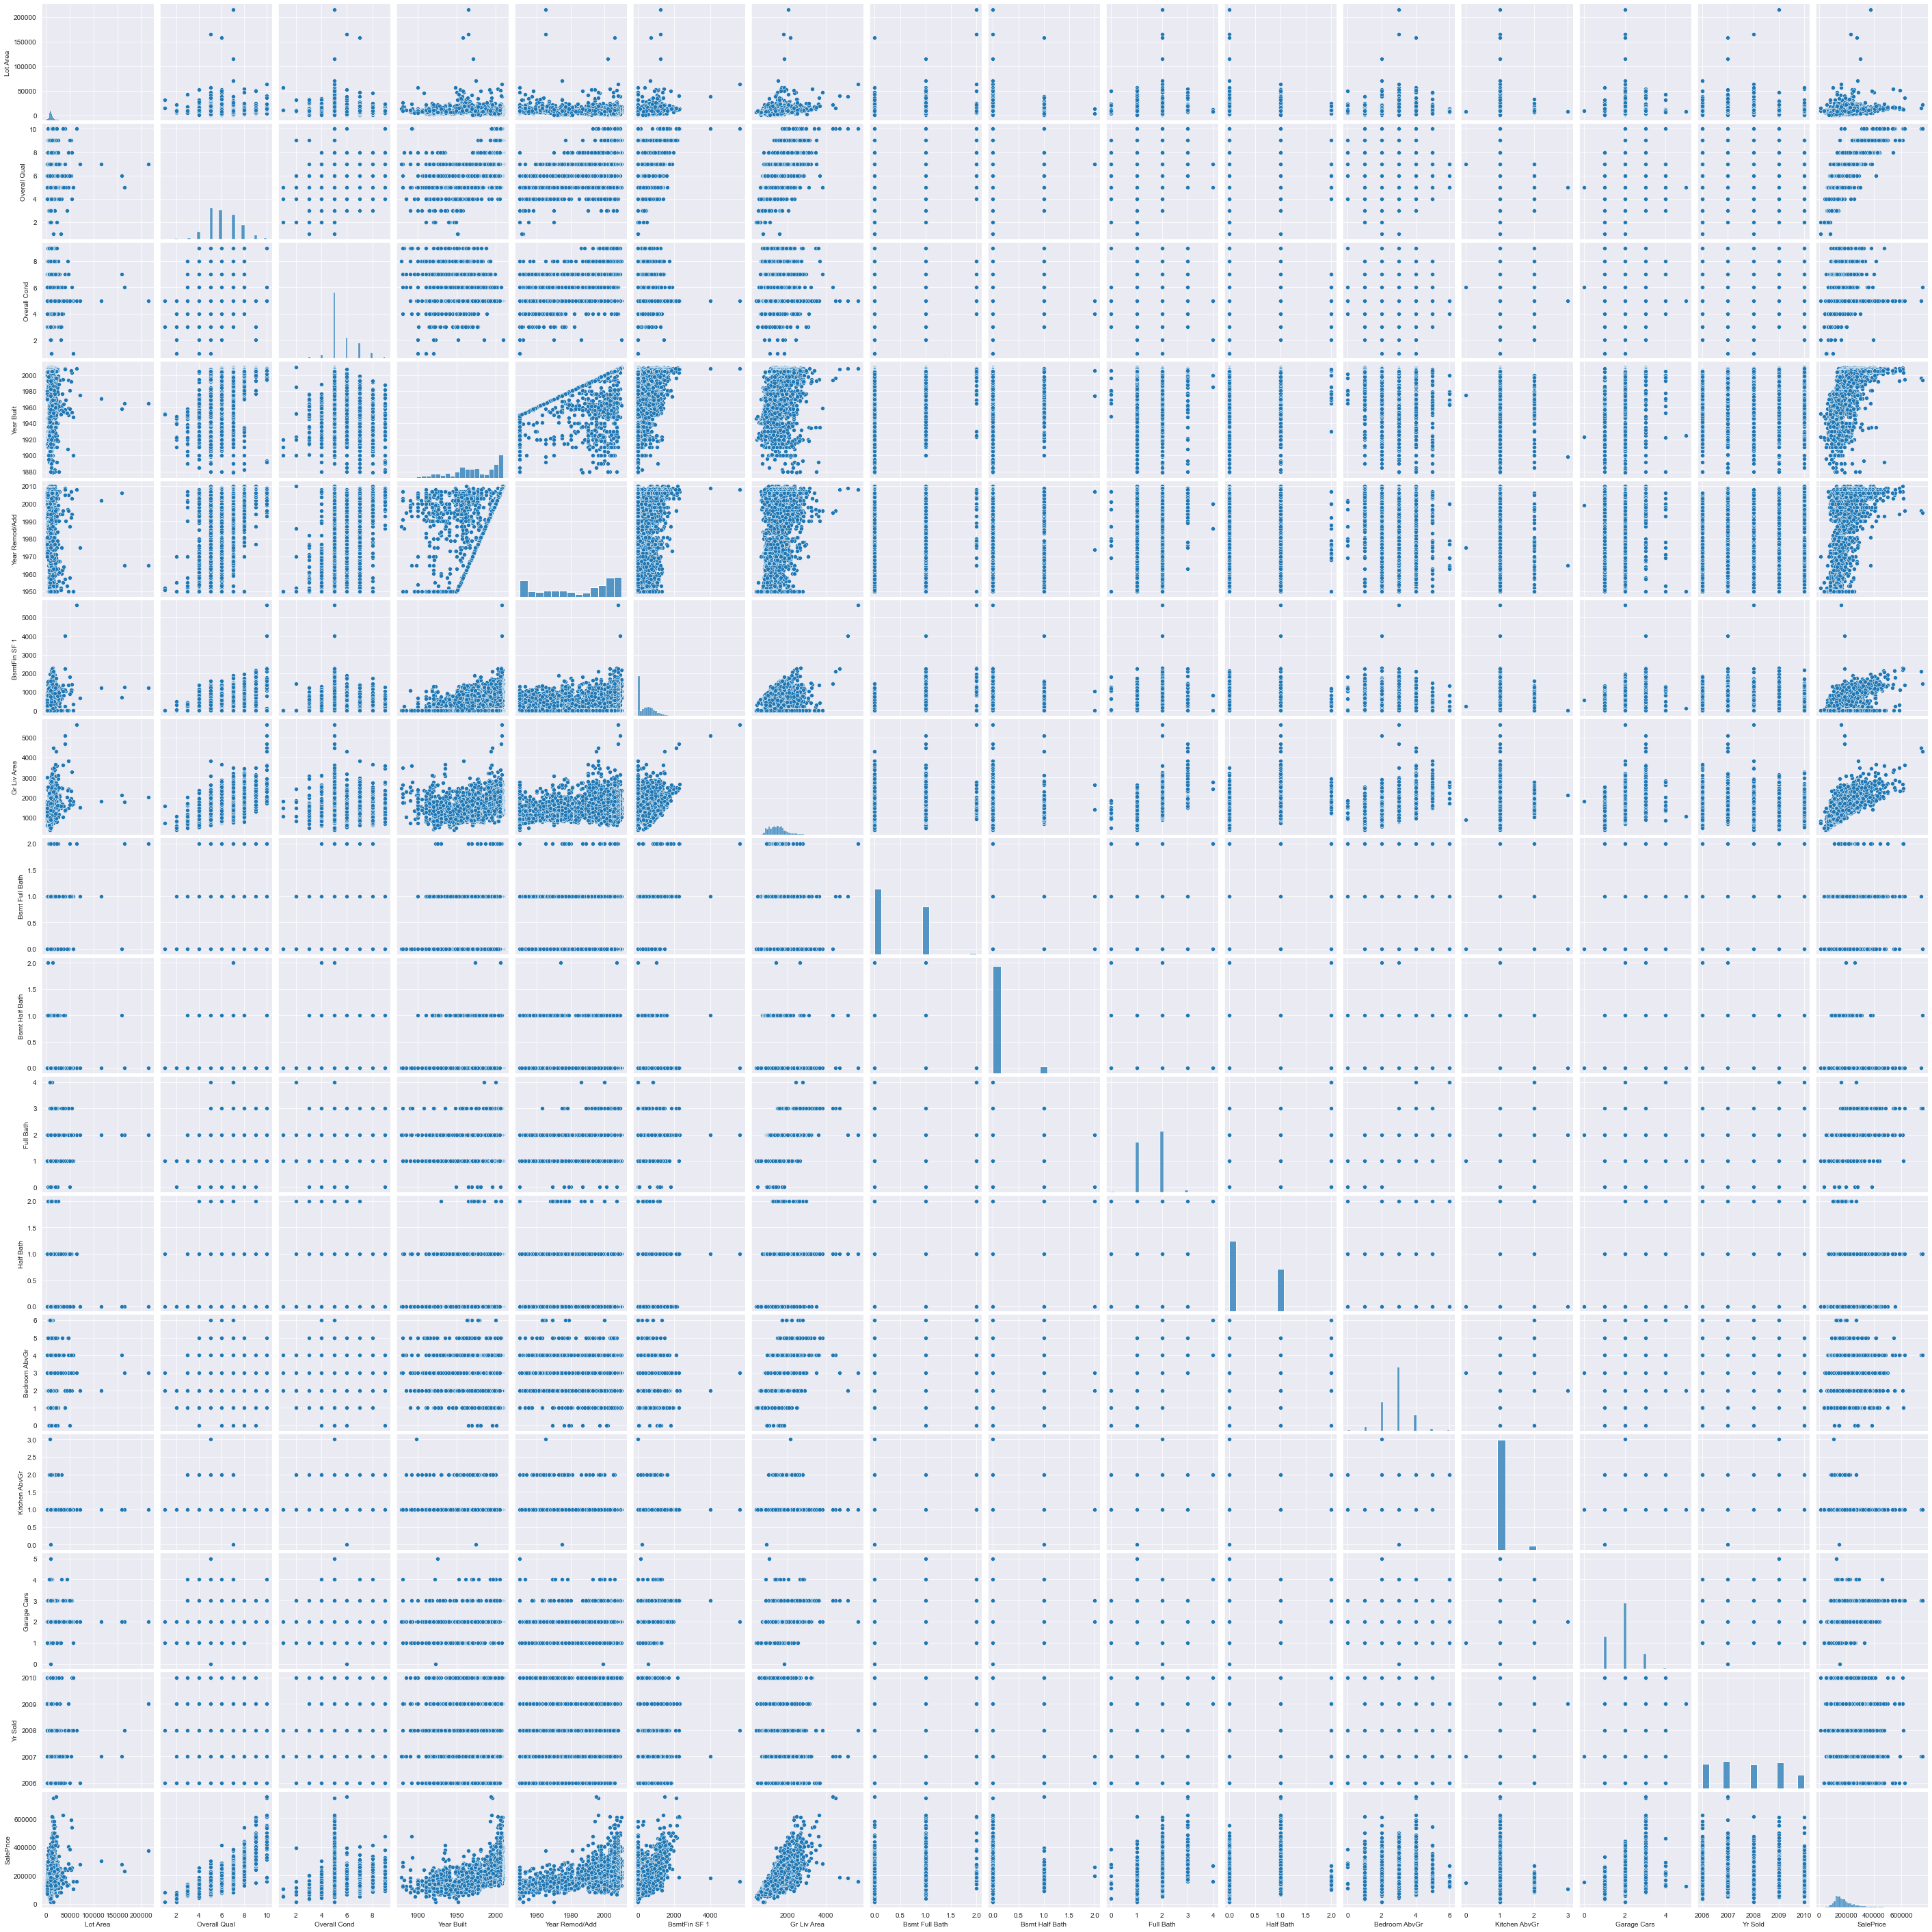

In [11]:
# Below is a graph for every column in the table and how it relates to other columns in the table.
# For the most part, the only useful graphs come from the pairings with the sale prices and all of the other columns.
sns.pairplot(housing_data)

<AxesSubplot:xlabel='Yr Sold', ylabel='Percent'>

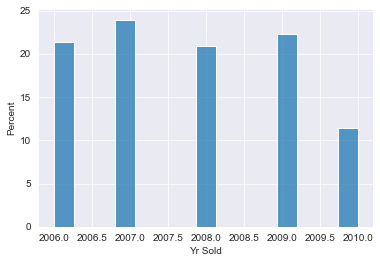

In [12]:
sns.histplot(x=housing_data["Yr Sold"], stat="percent")

## The table above shows the percentage of the houses sold each year in the training data. It gives a good insight about how the prices might be different depending on some external factors during the specific year. It also shows that the distribution is fairly even, with 2010 being the only year of the 5 that really did not match the others in quantity.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

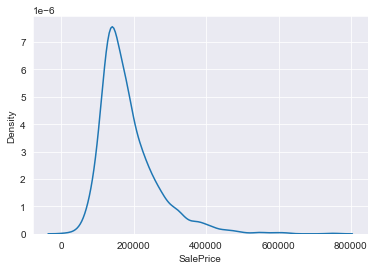

In [13]:
sns.kdeplot(housing_data["SalePrice"])

## The table above shows the distribution of the sale prices. It can be seen that the majority of the houses that were sold were around $175,000. That gives some good insight in the normal market value of the typical homes in the area.

## I am going to go through the descriptive model that I have chosen in order to see which factors relate to each other the most. Since I am the most interested in sale price, I will be focusing on that. To complete my descriptive model, I will be using K-Means clustering in order to see how closely things relate to each other. When it comes time to look at the data, the lower numbers mean that the items are more closely related.

C:\Users\15025\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(
C:\Users\15025\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


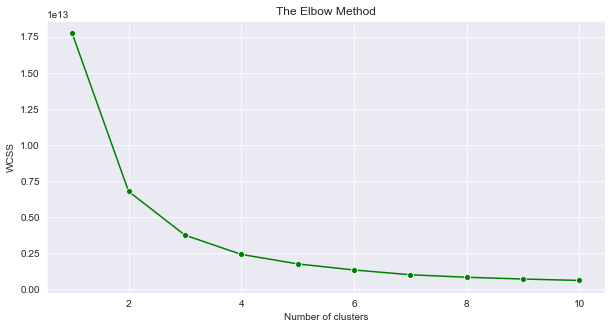

In [14]:
# Using the elbow method to find the optimal number of clusters (which happens to be 3 in this case)
from sklearn.cluster import KMeans

# to store WCSS
wcss = []

# for loop
for i in range(1, 11):

    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(housing_data)

    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## By using the elbow method, it looks like 3 clusters is the correct amount to use here to look for the centroids. That number will be used below.

In [15]:
# The following section is trying to find the k-clusters using the 3 clusters from the elbow method
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(housing_data)

kmeans.cluster_centers_

array([[1.49570134e+04, 8.56696429e+00, 5.19196429e+00, 1.99988839e+03,
        2.00357143e+03, 9.83250000e+02, 2.28247321e+03, 8.16964286e-01,
        1.78571429e-02, 2.05803571e+00, 6.11607143e-01, 2.98660714e+00,
        1.00000000e+00, 2.79910714e+00, 2.00766518e+03, 3.80754054e+05],
       [8.95890276e+03, 5.41356543e+00, 5.71968788e+00, 1.95987455e+03,
        1.97594118e+03, 3.52089436e+02, 1.27224130e+03, 3.54141657e-01,
        7.56302521e-02, 1.32533013e+00, 2.85114046e-01, 2.77611044e+00,
        1.04921969e+00, 1.57503001e+00, 2.00780312e+03, 1.36771366e+05],
       [1.16039887e+04, 7.01585504e+00, 5.39184598e+00, 1.99058777e+03,
        1.99685277e+03, 5.15220838e+02, 1.77970668e+03, 4.99433749e-01,
        4.53001133e-02, 1.93657984e+00, 5.30011325e-01, 2.94790487e+00,
        1.01698754e+00, 2.17893545e+00, 2.00778709e+03, 2.26619955e+05]])

In [16]:
print(kmeans.inertia_)

3739669213957.317


## As can be seen from above, the K-Means cluster does not show good results for the data. Using 3 clusters produces the best results for the amount of time, but the data still does not perform this test well. The categorical data (the ones shown in the graphs above that follow along straight lines) make the k-means clustering not very successful for this project. That can still be relevant data though, as it shows the two pieces of information that are the most related to the sale price being the basement finished area and the total square footage. I have included their graphs again below.

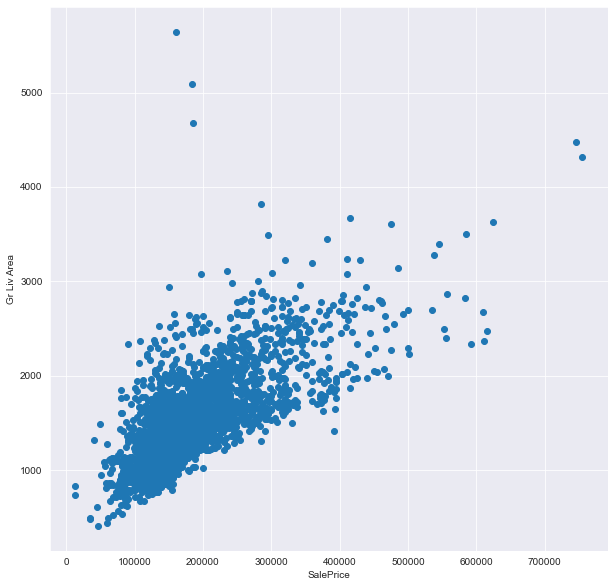

In [17]:
# Defining the two characteristics to plot
X = housing_data.loc[:, ['SalePrice', 'Gr Liv Area']]

# importing the module
import matplotlib.pyplot as plt

# image size
plt.figure(figsize=(10,10))

# ploting scatered graph
plt.scatter(x= X['SalePrice'], y=X['Gr Liv Area'])
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area');

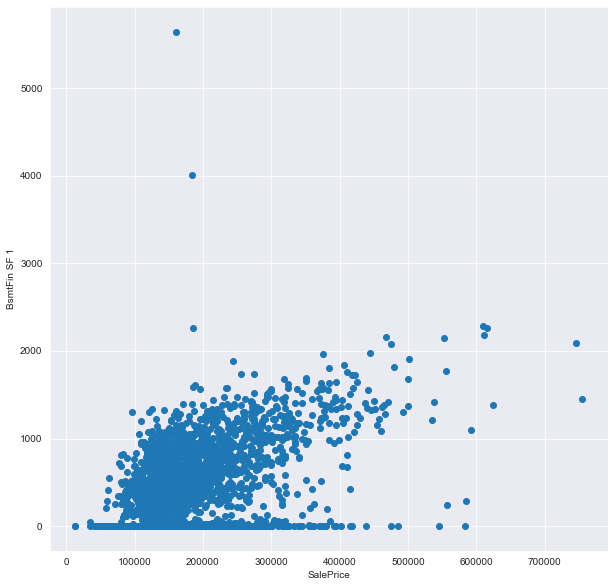

In [18]:
# Defining the two characteristics to plot
X = housing_data.loc[:, ['SalePrice', 'BsmtFin SF 1']]

# importing the module
import matplotlib.pyplot as plt

# image size
plt.figure(figsize=(10,10))

# ploting scatered graph
plt.scatter(x= X['SalePrice'], y=X['BsmtFin SF 1'])
plt.xlabel('SalePrice')
plt.ylabel('BsmtFin SF 1');

## In the next section, I am going to go through the predictive method for this project which uses a Gradient Boosting Machine. The GBM will create a series of trees that will become more accurate over time. This should allow for the model to become more accurate and reliable as more trees are created.


In [19]:
# These are the imports for the packages that I will need in order to create my gradient boosting machine. They come from the SciKitLearn library.
from sklearn.model_selection import train_test_split
from sklearn import ensemble
gbr = ensemble.GradientBoostingRegressor(n_estimators=1000, max_depth = 3, min_samples_split=2, learning_rate=0.1, loss='ls')

In [20]:
labels = housing_data['SalePrice']
train = housing_data.drop(['SalePrice'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.1, random_state=2)

In [21]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

In [22]:
gbr.score(x_test, y_test)

0.8912295368628589

## As can be seen above, the testing concluded with a score of nearly 0.891, which is fairly accurate for the first implementation of this project. That is a fairly high level of confidence to be able to predict housing prices and it should give the company good results and data to base their decisions off of. 

In [23]:
y_pred = gbr.predict(x_test[0:5])
y_pred

array([130368.6312233 , 303563.83551844, 172097.92054931, 152034.00675731,
       539216.24702162])

In [25]:
x_test[0:5]

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Garage Cars,Yr Sold
1916,6240,6,6,1931,1950,425,1367,0,0,1,0,3,1,1,2007
2115,18044,8,5,1986,1986,0,2726,0,0,2,1,2,1,2,2007
1287,9120,7,6,1925,1950,329,1820,1,0,2,0,4,1,1,2008
79,9672,6,5,1984,1985,338,1097,0,0,2,0,3,1,2,2010
15,53504,8,5,2003,2003,1416,3279,1,0,3,1,4,1,3,2010


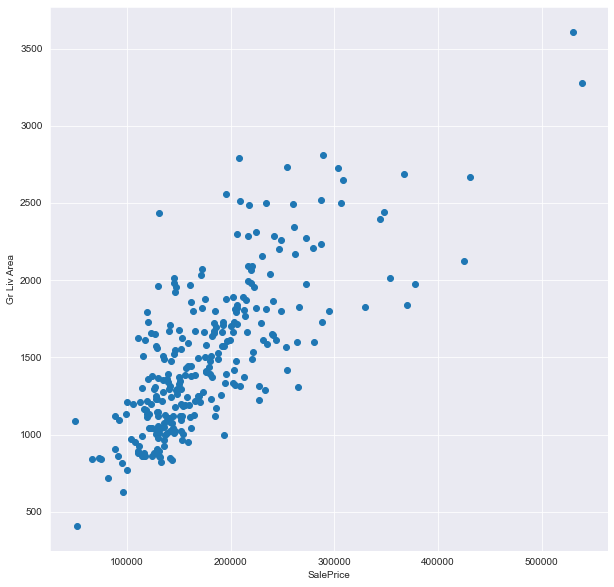

In [30]:
y_pred = gbr.predict(x_test)
X = y_pred
Y = x_test["Gr Liv Area"]
# importing the module
import matplotlib.pyplot as plt

# image size
plt.figure(figsize=(10,10))

# ploting scatered graph
plt.scatter(x=X, y=Y)
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area');

## The graph above shows the predictive model at work by comparing the square footage to the actual price that was predicted by the model. The graph that includes all the data is show below, and it can be used as a comparison. This shows that the model was fairly accurate (from a graph standpoint) at predicting housing prices.

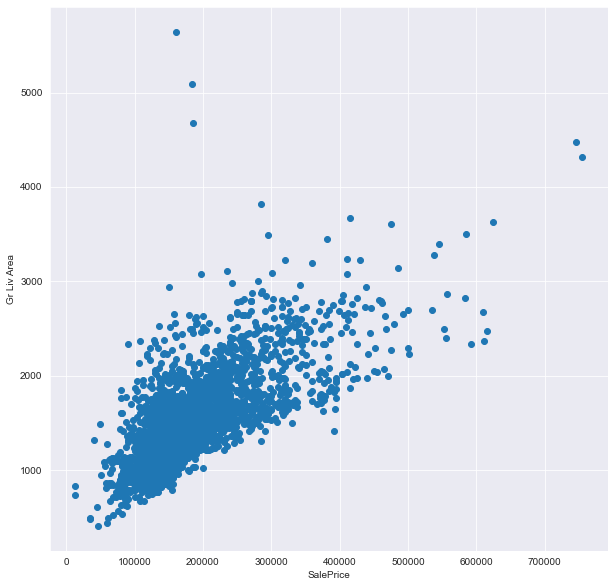

In [32]:
# Defining the two characteristics to plot
X = housing_data.loc[:, ['SalePrice', 'Gr Liv Area']]

# importing the module
import matplotlib.pyplot as plt

# image size
plt.figure(figsize=(10,10))

# ploting scatered graph
plt.scatter(x= X['SalePrice'], y=X['Gr Liv Area'])
plt.xlabel('SalePrice')
plt.ylabel('Gr Liv Area');

## Now that the model has been trained, it would be ready to accept some new data about the houses in the area. This would allow for the prediction model to start predicting values for the houses that might be purchased for future selling or renting.